In [1]:
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [3]:
df = pd.read_csv("GoDash-26FEB - Sheet1.csv")

In [4]:
df = df.replace(np.nan, 0)

In [5]:
df.shape[0]

2160

In [6]:
df.columns

Index(['total_stall_events', 'avg_stall', 'total_stalls', 'arr_first_seg_ms',
       'switching_freq', 'amplitude_1', 'amplitude_2', 'bandwidth',
       'packetloss', 'delay', 'competion', 'user', 'mpd', 'algorithm',
       'packets_a_to_b', 'packets_b_to_a', 'rtt_avg', 'rtt_std',
       'segment_size', 'througput_a2b', 'througput_b2a', 'delivery_rate',
       'avg_vid_quality', 'min_quality', 'max_quality', '320x240', '384x288',
       '512x384', '512x384.1', '640x480', '720x480', '1280x720', '1280x720.1',
       '1920x1080', '1920x1080.1', 'rtt_application', 'seg_duration', 'p1203',
       'Clae', 'Duanmu', 'Yin', 'Yu', 'FPS', 'Protocol', 'exp_ID',
       'algorithmint'],
      dtype='object')

In [13]:
#g = sns.FacetGrid(df, col="algorithm", hue="competion", height=4)
#g.map(plt.scatter, "througput_b2a", "rtt_avg")
#g.add_legend()
#plt.savefig('7.png', dpi = 600)

In [14]:
nodesColors = ["#3f8a27", "#fac507", "#fa0707"]

In [28]:
elasticBBA = df[(df['algorithm'] == 'conv') | (df['algorithm'] == 'logistic')]

Text(0.5, 1, 'Conventional (Throughput)')

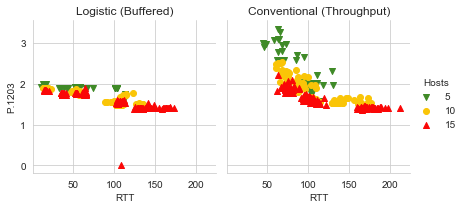

In [30]:
g = sns.FacetGrid(elasticBBA, col="algorithm", hue="competion",palette=nodesColors, hue_kws={"marker": ["v", "o","^"]})
g.map(plt.scatter, "rtt_avg", "p1203")
g.add_legend(title= 'Hosts');
g.set_axis_labels("RTT", "P.1203")
axes = g.axes.flatten()
axes[0].set_title("Logistic (Buffered)")
axes[1].set_title("Conventional (Throughput)")

Text(0.5, 1, 'Conventional (Throughput)')

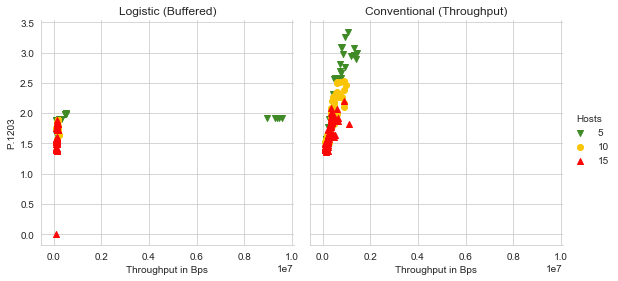

In [32]:
g = sns.FacetGrid(elasticBBA, col="algorithm", hue="competion",palette=nodesColors, height=4, hue_kws={"marker": ["v", "o","^"]})
g.map(plt.scatter, "througput_b2a", "p1203")
g.add_legend(title= 'Hosts');
g.set_axis_labels("Throughput in Bps", "P.1203")
axes = g.axes.flatten()
axes[0].set_title("Logistic (Buffered)")
axes[1].set_title("Conventional (Throughput)")

In [8]:
df['algorithm'].unique()

array(['bba', 'logistic', 'exponential', 'average', 'geometric',
       'elastic', 'arbiter', 'conv'], dtype=object)

In [9]:
bestCase = df[(df['delay'] == 10) & (df['bandwidth'] == 15)]

In [10]:
worstCase = df[(df['delay'] == 100) & (df['bandwidth'] == 5)]

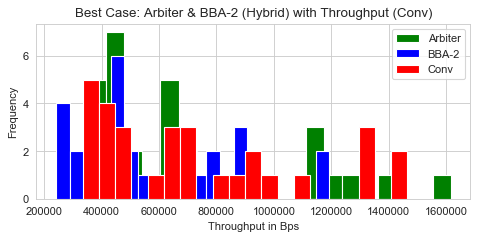

In [11]:
kwargs = dict(bins=20)
plt.figure(figsize=(7,3), dpi= 80)
plt.hist(bestCase.loc[bestCase['algorithm']=='arbiter','througput_b2a'], **kwargs, color='green', label='Arbiter')
plt.hist(bestCase.loc[bestCase['algorithm']=='bba','througput_b2a'], **kwargs, color='blue', label='BBA-2')
plt.hist(bestCase.loc[bestCase['algorithm']=='conv','througput_b2a'], **kwargs, color='red', label='Conv')
#plt.hist(df.loc[df['algorithm']=='average','througput_b2a'], **kwargs, color='black', label='Average')
plt.gca().set(title='Best Case: Arbiter & BBA-2 (Hybrid) with Throughput (Conv)', ylabel='Frequency', xlabel='Throughput in Bps')
plt.gcf().subplots_adjust(bottom=0.15)   
plt.legend()

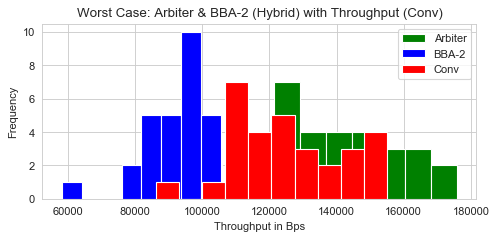

In [12]:
kwargs = dict(bins=10)
plt.figure(figsize=(7,3), dpi= 80)
plt.hist(worstCase.loc[worstCase['algorithm']=='arbiter','througput_b2a'], **kwargs, color='green', label='Arbiter')
plt.hist(worstCase.loc[worstCase['algorithm']=='bba','througput_b2a'], **kwargs, color='blue', label='BBA-2')
plt.hist(worstCase.loc[worstCase['algorithm']=='conv','througput_b2a'], **kwargs, color='red', label='Conv')
#plt.hist(df.loc[df['algorithm']=='average','througput_b2a'], **kwargs, color='black', label='Average')
plt.gca().set(title='Worst Case: Arbiter & BBA-2 (Hybrid) with Throughput (Conv)', ylabel='Frequency', xlabel='Throughput in Bps')
plt.gcf().subplots_adjust(bottom=0.15)   
plt.legend()

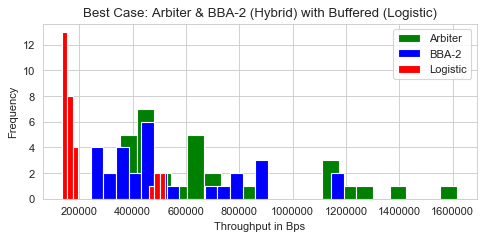

In [13]:
kwargs = dict(bins=20)
plt.figure(figsize=(7,3), dpi= 80)
plt.hist(bestCase.loc[bestCase['algorithm']=='arbiter','througput_b2a'], **kwargs, color='green', label='Arbiter')
plt.hist(bestCase.loc[bestCase['algorithm']=='bba','througput_b2a'], **kwargs, color='blue', label='BBA-2')
plt.hist(bestCase.loc[bestCase['algorithm']=='logistic','througput_b2a'], **kwargs, color='red', label='Logistic')
#plt.hist(df.loc[df['algorithm']=='average','througput_b2a'], **kwargs, color='black', label='Average')
plt.gca().set(title='Best Case: Arbiter & BBA-2 (Hybrid) with Buffered (Logistic)', ylabel='Frequency', xlabel='Throughput in Bps')
plt.gcf().subplots_adjust(bottom=0.15)   
plt.legend()

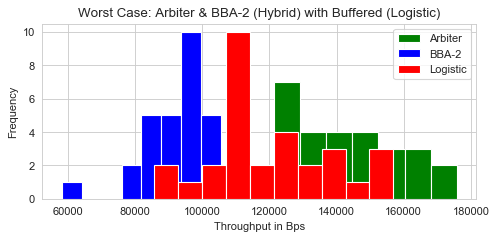

In [14]:
kwargs = dict(bins=10)
plt.figure(figsize=(7,3), dpi= 80)
plt.hist(worstCase.loc[worstCase['algorithm']=='arbiter','througput_b2a'], **kwargs, color='green', label='Arbiter')
plt.hist(worstCase.loc[worstCase['algorithm']=='bba','througput_b2a'], **kwargs, color='blue', label='BBA-2')
plt.hist(worstCase.loc[worstCase['algorithm']=='logistic','througput_b2a'], **kwargs, color='red', label='Logistic')
#plt.hist(df.loc[df['algorithm']=='average','througput_b2a'], **kwargs, color='black', label='Average')
plt.gca().set(title='Worst Case: Arbiter & BBA-2 (Hybrid) with Buffered (Logistic)', ylabel='Frequency', xlabel='Throughput in Bps')
plt.gcf().subplots_adjust(bottom=0.15)   
plt.legend()

In [15]:
#df = df[(df['algorithm'] == 'arbiter') | (df['algorithm'] == 'bba') | (df['algorithm'] == 'conv')| (df['algorithm'] == 'logistic')]

In [16]:
#hybrid.shape[0]

In [17]:
#hybrid.shape[0]

In [18]:
df.shape[0]

2160

In [19]:
X = df[['througput_b2a', 'rtt_avg', 'rtt_std','algorithmint']]
y = df['p1203']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lm = LinearRegression()

In [24]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

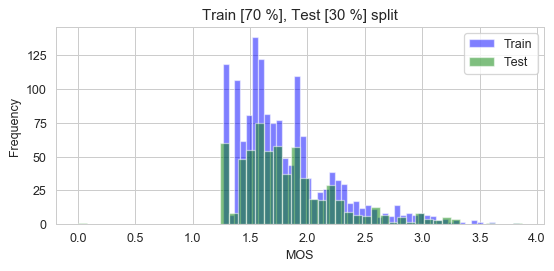

In [25]:
fig, axs =  plt.subplots(1,1,figsize=(7,3), dpi= 90)
#plt.figure()
plt.hist(y_train, bins=50, facecolor='blue', alpha=0.5, label='Train')
plt.hist(y_test,  bins=50,facecolor='green', alpha=0.5, label='Test')
plt.legend()
plt.gca().set(title='Train [70 %], Test [30 %] split', ylabel='Frequency', xlabel='MOS')
plt.gcf().subplots_adjust(bottom=0.15) 
#plt.savefig('bbatp/traintestsplit.png', dpi = 300)

In [26]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Density')

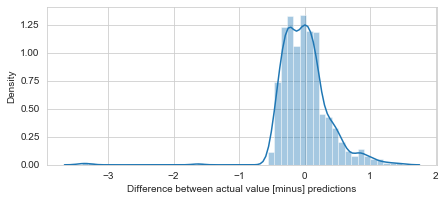

In [27]:
plt.figure(figsize=(7,3))
sns.distplot((y_test-predictions))
plt.gcf().subplots_adjust(bottom=0.15) 
plt.xlabel("Difference between actual value [minus] predictions")
plt.ylabel("Density")

In [28]:
from sklearn import metrics

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.2622683407630076
MSE: 0.14697135205005596
RMSE: 0.3833684286036814


In [30]:
ap = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
ap

,Actual,Predicted
1225,2.858633,2.142345
459,1.783367,1.808854
55,1.411600,1.686051
1432,1.970033,1.945207
122,1.308100,1.760644
...,...,...
1052,1.998433,1.877594
857,2.067000,1.913829
850,2.369633,1.968276
1559,2.587700,2.080223


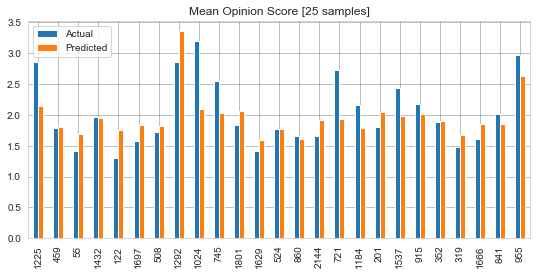

In [31]:
df1 = ap.head(25)
df1.plot(kind='bar',figsize=(9,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
plt.title("Mean Opinion Score [25 samples]")
#plt.savefig('bbatp/25samples.png', dpi = 300)
plt.show()